## Wrapped normal mixture for all curvatures

In [113]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import numpy as np
import matplotlib.pyplot as plt
from hyperdt.wrapped_normal_all_curvature import WrappedNormalMixture
from hyperdt.all_curvature_DT import HyperspaceDecisionTree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Generate wrapped normal mixture for hyperbolic, hypersphere and Euclidean spaces

In [115]:
K_hyp = -0.5
hyp = WrappedNormalMixture(num_points=1000, num_classes=5, n_dim=2, curvature=K_hyp, seed=0, cov_scale=0.3)
X_hyp, y_hyp, X_hyp_means = hyp.generate_data()
assert np.allclose(hyp.manifold.metric.squared_norm(X_hyp), 1 / hyp.curvature)

In [116]:
K_sph = 0.5
sph = WrappedNormalMixture(num_points=1000, num_classes=5, n_dim=2, curvature=K_sph, seed=0, cov_scale=0.3)
X_sph, y_sph, X_sph_means = sph.generate_data()
assert np.allclose(sph.manifold.metric.squared_norm(X_sph), 1 / sph.curvature)

In [117]:
K_euc = 0.0
euc = WrappedNormalMixture(num_points=1000, num_classes=5, n_dim=2, curvature=K_euc, seed=0, cov_scale=0.3)
X_euc, y_euc, X_euc_means = euc.generate_data()

### HyperDT for hyperboloid

In [118]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_hyp, y_hyp, test_size=0.2, random_state=0)

# Fit hyperbolic decision tree classifier
hypdt = HyperspaceDecisionTree(max_depth=5, signed_curvature=K_hyp)
hypdt.fit(X_train, y_train)

# Compute accuracy
hypdt_score = hypdt.score(X_test, y_test)
print(hypdt_score)

0.775


In [119]:
# Benchmark against sklearn's decision tree classifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print(dt_score)

0.79


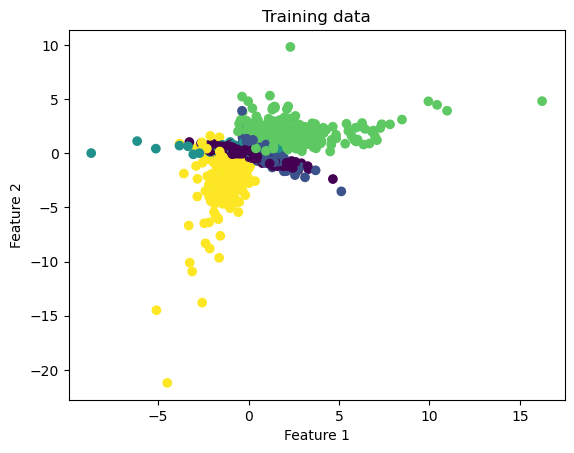

In [120]:
# Plot data in Euclidean space
plt.scatter(X_hyp[:, 1], X_hyp[:, 2], c=y_hyp, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training data')
plt.show()

### HyperDT for hypersphere

In [121]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sph, y_sph, test_size=0.2, random_state=0)

# Fit hyperbolic decision tree classifier
sphdt = HyperspaceDecisionTree(max_depth=5, signed_curvature=K_sph)
sphdt.fit(X_train, y_train)

# Compute accuracy
sphdt_score = sphdt.score(X_test, y_test)
print(sphdt_score)

0.705


In [122]:
# Benchmark against sklearn's decision tree classifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print(dt_score)

0.645


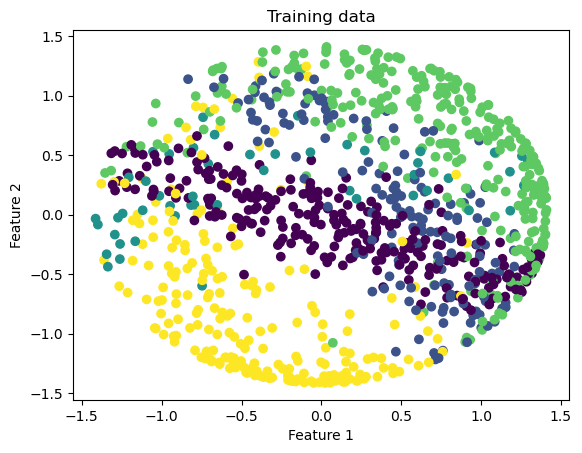

In [123]:
# Plot data in Euclidean space
plt.scatter(X_sph[:, 1], X_sph[:, 2], c=y_sph, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training data')
plt.show()

### HyperDT for Euclidean

In [124]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_euc, y_euc, test_size=0.2, random_state=0)

# Train decision tree classifier
eucdt = HyperspaceDecisionTree(max_depth=5, signed_curvature=K_euc)
eucdt.fit(X_train, y_train)

# Compute accuracy
eucdt_score = eucdt.score(X_test, y_test)
print(eucdt_score)

0.68


In [125]:
# Benchmark against sklearn's decision tree classifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print(dt_score)

0.705


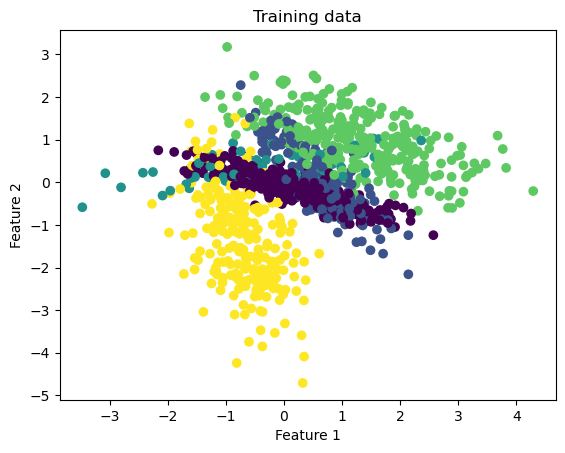

In [126]:
# Plot data
plt.scatter(X_euc[:, 1], X_euc[:, 2], c=y_euc, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training data')
plt.show()